In [2]:
import os, glob
import pandas as pd

# CSV লোড
csv_path = r"F:\Thessis\data-set\Aptos_1\Retinopathy_info\Retinopathy_info.csv"
df = pd.read_csv(csv_path)

print(df.head())
print(df.info())

        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
None


In [2]:
# dataset ফোল্ডার (যেখানে ইমেজ আনজিপ করেছো)
extract_path = r"F:\Thessis\data-set\Aptos_1\Retinopathy_images"

# valid image extensions
img_exts = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}

# সব ইমেজ path খুঁজে বের করা (subfolder সহ)
all_files = glob.glob(os.path.join(extract_path, "**", "*.*"), recursive=True)
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in img_exts]

print(f"Total image files found: {len(image_files)}")
print("Example:", image_files[:5])

Total image files found: 3662
Example: ['F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\000c1434d8d7.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\001639a390f0.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\0024cdab0c1e.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\002c21358ce6.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\005b95c28852.png']


In [3]:
# Detect the ID column
possible_id_cols = ['id_code', 'image', 'filename', 'file_name', 'image_id', 'id']
id_col = next((c for c in possible_id_cols if c in df.columns), None)
if id_col is None:
    raise ValueError(f"Couldn't find an ID column in CSV. Columns: {list(df.columns)}")
print("Using ID column:", id_col)


# Normalize functions
def norm_csv_id(x):
    x = str(x).strip()
    x = os.path.basename(x)             # remove any folder path
    x = os.path.splitext(x)[0]          # remove extension
    return x.lower()

def norm_file_basename(p):
    return os.path.splitext(os.path.basename(p))[0].lower()

# Apply normalization
df['id_norm'] = df[id_col].map(norm_csv_id)
basename_to_path = {norm_file_basename(p): p for p in image_files}

# Map to image paths
df['image_path'] = df['id_norm'].map(basename_to_path)
df = df[df['image_path'].notna()].reset_index(drop=True)

print(f"✅ After cleaning: {len(df)} images remain")

Using ID column: id_code
✅ After cleaning: 3648 images remain


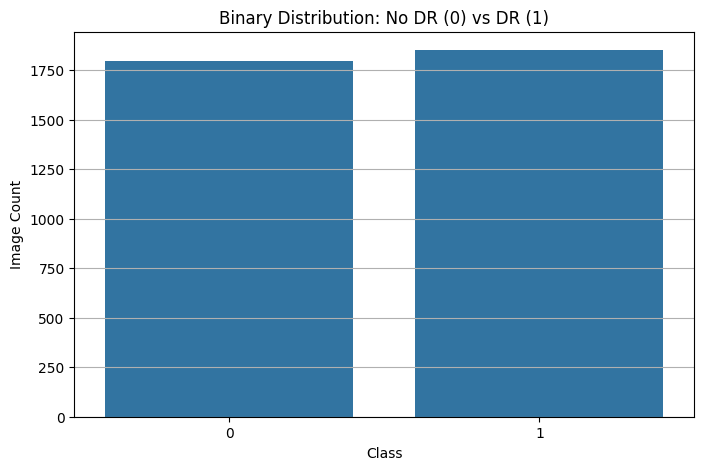

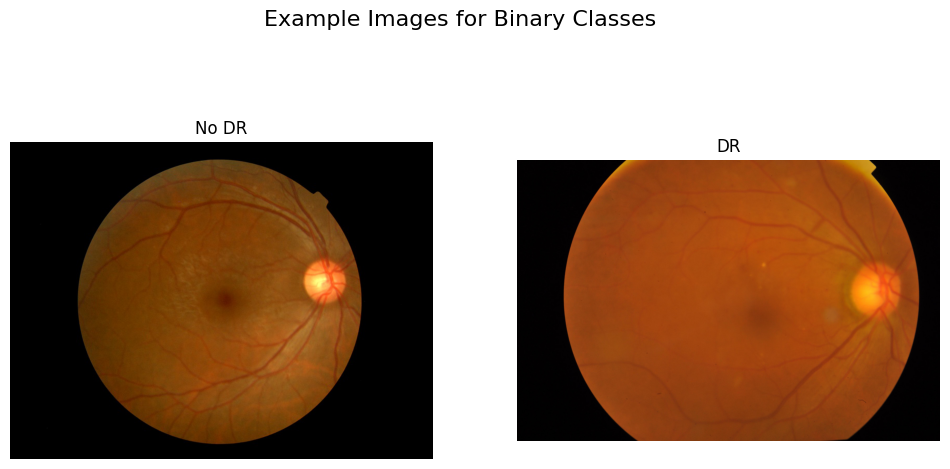

Cleaned CSV saved to: F:\Thessis\Data-Set 2\Aptos\Retinopathy_cleaned.csv


In [4]:
# Original: 0, 1, 2, 3, 4
# Binary: 0 = No DR, 1 = Any DR
df['binary_label'] = (df['diagnosis'] != 0).astype(int)

# =========================
# 6️⃣ Plot class distribution
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='binary_label')
plt.title('Binary Distribution: No DR (0) vs DR (1)')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.grid(axis='y')
plt.show()

# =========================
# 7️⃣ Show sample images
# =========================
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for label in [0, 1]:
    sample_path = df[df['binary_label'] == label].iloc[0]['image_path']
    img = Image.open(sample_path)
    axes[label].imshow(img)
    axes[label].set_title("No DR" if label == 0 else "DR")
    axes[label].axis("off")
plt.suptitle("Example Images for Binary Classes", fontsize=16)
plt.show()

# =========================
# 8️⃣ Optional: Save Cleaned CSV
# =========================
clean_csv_path = r"F:\Thessis\Data-Set 2\Aptos\Retinopathy_cleaned.csv"
df.to_csv(clean_csv_path, index=False)
print(f"Cleaned CSV saved to: {clean_csv_path}")

In [9]:
import pandas as pd

# 👇 Add this line: set the folder where your dataset is located
extract_path = r"F:\Thessis\data-set\Bangladeshi_Dataset"
img_exts = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}
all_files = glob.glob(os.path.join(extract_path, "**", "*.*"), recursive=True)
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in img_exts]

data = []
for path in image_files:
    folder = os.path.basename(os.path.dirname(path)).lower()
    if "diabetic" in folder:  # DR present
        label = 1
    elif "healthy" in folder:  # No DR
        label = 0
    else:
        continue  # skip if doesn't match expected folder names
    data.append({"image_path": path, "binary_label": label})

df = pd.DataFrame(data)
print(f"✅ Total images found: {len(df)}")
print(df.head())

✅ Total images found: 2533
                                          image_path  binary_label
0  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
1  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
2  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
3  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
4  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1


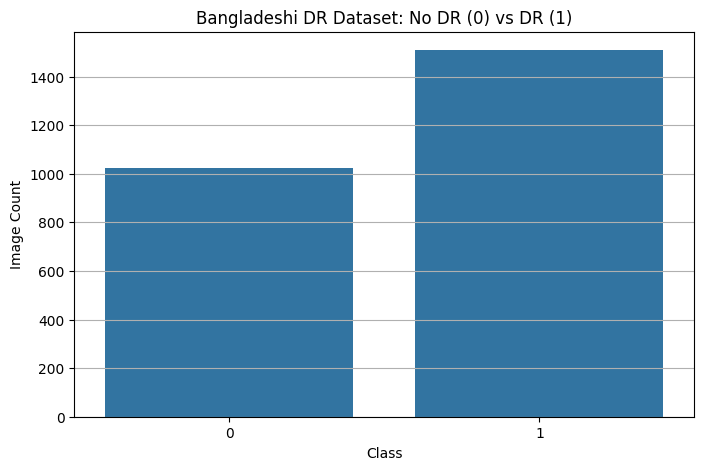

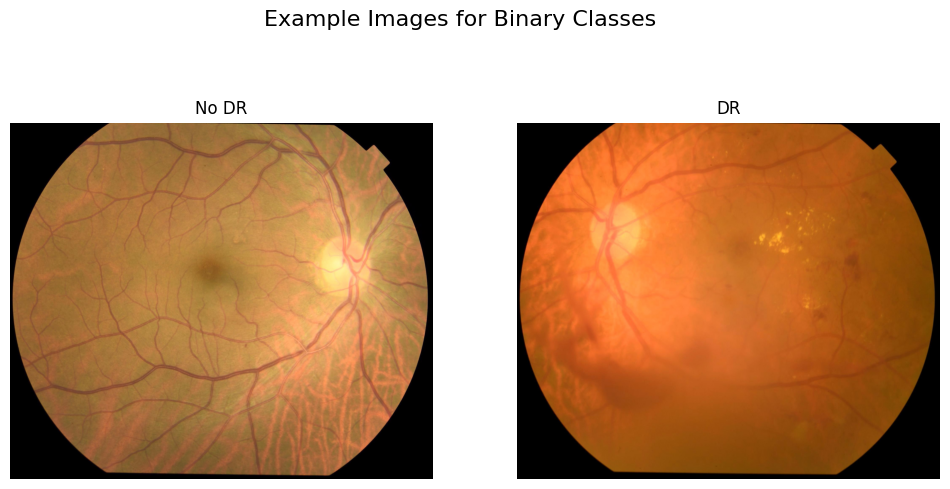

Cleaned CSV saved to: F:\Thessis\Data-Set 2\Bangladeshi-Dataset/bangladeshi_cleaned.csv


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='binary_label')
plt.title('Bangladeshi DR Dataset: No DR (0) vs DR (1)')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.grid(axis='y')
plt.show()

# =========================
# 4️⃣ Show sample images
# =========================
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for label in [0, 1]:
    sample_path = df[df['binary_label'] == label].iloc[0]['image_path']
    img = Image.open(sample_path)
    axes[label].imshow(img)
    axes[label].set_title("No DR" if label == 0 else "DR")
    axes[label].axis("off")
plt.suptitle("Example Images for Binary Classes", fontsize=16)
plt.show()

# =========================
# 5️⃣ Save cleaned CSV
# =========================
clean_csv_path = r"F:\Thessis\Data-Set 2\Bangladeshi-Dataset/bangladeshi_cleaned.csv"
df.to_csv(clean_csv_path, index=False)
print(f"Cleaned CSV saved to: {clean_csv_path}")

In [1]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import numpy as np
import albumentations as A

# ===== CONFIG =====
CSV_PATH = r"F:\Thessis\Data-Set 2\Aptos\Retinopathy_cleaned.csv"    # change if needed
OUTPUT_DIR = r"F:\Thessis\Data-Set 2\Aptos"        # where train/val/test folders will be created
IMG_SIZE = 299                             # match model input
APPLY_CLAHE = True                         # contrast enhancement
TEST_SIZE = 0.2
VAL_SIZE = 0.5  # 50% of test split → 10% val overall
# ==================

# Load dataframe
df = pd.read_csv(CSV_PATH)

# Stratified split
train_df, temp_df = train_test_split(df, test_size=TEST_SIZE, stratify=df['binary_label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=VAL_SIZE, stratify=temp_df['binary_label'], random_state=42)

splits = {
    "train": train_df,
    "val": val_df,
    "test": test_df
}

# Ensure folders exist
for split_name in ["train", "val", "test"]:
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        os.makedirs(folder, exist_ok=True)

# =========================
# Image preprocessing function
# =========================
def preprocess_image(image_path, img_size=IMG_SIZE, apply_clahe=APPLY_CLAHE, augment=False, lesion_mask=None):
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply CLAHE
    if apply_clahe:
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)

    # Normalize [0,1]
    img = img.astype(np.float32) / 255.0

    # Augmentation (for training only)
    if augment:
        aug_pipeline = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.2),
            A.RandomRotate90(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
            A.RandomBrightnessContrast(p=0.5),
            A.GaussianBlur(p=0.2)
        ])
        img = aug_pipeline(image=img)["image"]

    # Lesion annotation overlay (optional)
    if lesion_mask is not None and os.path.exists(lesion_mask):
        mask = cv2.imread(lesion_mask, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (img_size, img_size))
        mask = np.expand_dims(mask, axis=-1).astype(np.float32) / 255.0
        img[..., 0] = np.clip(img[..., 0] + mask[..., 0], 0, 1)

    # Convert back to uint8 for saving
    img = (img * 255).astype(np.uint8)

    return img

# =========================
# Process and save images
# =========================
for split_name, split_df in splits.items():
    print(f"Processing {split_name} split...")
    for _, row in tqdm(split_df.iterrows(), total=len(split_df)):
        label = row['binary_label']
        src_path = row['image_path']
        dst_path = os.path.join(OUTPUT_DIR, split_name, str(label), os.path.basename(src_path))

        img = preprocess_image(src_path, augment=(split_name == "train"))
        if img is None:
            print(f"⚠️ Missing or unreadable file: {src_path}")
            continue

        cv2.imwrite(dst_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# =========================
# Show counts
# =========================
print("\n📊 Image count by split and label:")
for split_name in ["train", "val", "test"]:
    total_count = 0
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        count = len(os.listdir(folder))
        total_count += count
        print(f"{split_name}/{label}: {count} images")
    print(f"➡ {split_name} total: {total_count} images\n")

print(f"✅ Done! Preprocessed and split dataset saved at: {OUTPUT_DIR}")


Processing train split...


100%|██████████| 2918/2918 [06:34<00:00,  7.39it/s]


Processing val split...


100%|██████████| 365/365 [00:51<00:00,  7.05it/s]


Processing test split...


100%|██████████| 365/365 [00:46<00:00,  7.87it/s]


📊 Image count by split and label:
train/0: 1437 images
train/1: 1481 images
➡ train total: 2918 images

val/0: 179 images
val/1: 186 images
➡ val total: 365 images

test/0: 180 images
test/1: 185 images
➡ test total: 365 images

✅ Done! Preprocessed and split dataset saved at: F:\Thessis\Data-Set 2\Aptos


In [2]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import numpy as np
import albumentations as A

# ===== CONFIG =====
CSV_PATH = r"F:\Thessis\data-set\Bangladeshi_Dataset\bangladeshi_cleaned.csv"
OUTPUT_DIR = r"F:\Thessis\Data-Set 2\Bangladeshi-Dataset"  # where train/val/test folders will be created
IMG_SIZE = 299                             # match training model input
APPLY_CLAHE = True                         # contrast enhancement
TEST_SIZE = 0.2
VAL_SIZE = 0.5  # 50% of test split → 10% val overall
# ==================

# Load dataframe
df = pd.read_csv(CSV_PATH)

# Stratified split
train_df, temp_df = train_test_split(df, test_size=TEST_SIZE, stratify=df['binary_label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=VAL_SIZE, stratify=temp_df['binary_label'], random_state=42)

splits = {
    "train": train_df,
    "val": val_df,
    "test": test_df
}

# Ensure folders exist
for split_name in ["train", "val", "test"]:
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        os.makedirs(folder, exist_ok=True)

# =========================
# Image preprocessing function
# =========================
def preprocess_image(image_path, img_size=IMG_SIZE, apply_clahe=APPLY_CLAHE, augment=False, lesion_mask=None):
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply CLAHE
    if apply_clahe:
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)

    # Normalize [0,1]
    img = img.astype(np.float32) / 255.0

    # Augmentation (only for training split)
    if augment:
        aug_pipeline = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.2),
            A.RandomRotate90(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
            A.RandomBrightnessContrast(p=0.5),
            A.GaussianBlur(p=0.2)
        ])
        img = aug_pipeline(image=img)["image"]

    # Lesion annotation overlay (optional placeholder)
    if lesion_mask is not None and os.path.exists(lesion_mask):
        mask = cv2.imread(lesion_mask, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (img_size, img_size))
        mask = np.expand_dims(mask, axis=-1).astype(np.float32) / 255.0
        img[..., 0] = np.clip(img[..., 0] + mask[..., 0], 0, 1)

    # Convert back to uint8 for saving
    img = (img * 255).astype(np.uint8)

    return img

# =========================
# Process and save images
# =========================
for split_name, split_df in splits.items():
    print(f"Processing {split_name} split...")
    for _, row in tqdm(split_df.iterrows(), total=len(split_df)):
        label = row['binary_label']
        src_path = row['image_path']
        dst_path = os.path.join(OUTPUT_DIR, split_name, str(label), os.path.basename(src_path))

        img = preprocess_image(src_path, augment=(split_name == "train"))
        if img is None:
            print(f"⚠️ Missing or unreadable file: {src_path}")
            continue

        cv2.imwrite(dst_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# =========================
# Show counts
# =========================
print("\n📊 Image count by split and label:")
for split_name in ["train", "val", "test"]:
    total_count = 0
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        count = len(os.listdir(folder))
        total_count += count
        print(f"{split_name}/{label}: {count} images")
    print(f"➡ {split_name} total: {total_count} images\n")

print(f"✅ Done! Preprocessed and split dataset saved at: {OUTPUT_DIR}")


Processing train split...


100%|██████████| 2026/2026 [02:21<00:00, 14.32it/s]


Processing val split...


100%|██████████| 253/253 [00:16<00:00, 15.09it/s]


Processing test split...


100%|██████████| 254/254 [00:17<00:00, 14.75it/s]


📊 Image count by split and label:
train/0: 819 images
train/1: 1207 images
➡ train total: 2026 images

val/0: 102 images
val/1: 151 images
➡ val total: 253 images

test/0: 103 images
test/1: 151 images
➡ test total: 254 images

✅ Done! Preprocessed and split dataset saved at: F:\Thessis\Data-Set 2\Bangladeshi-Dataset


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

# =======================
# 1. CNN Backbone (ResNet + Inception)
# =======================
class CNNBackbone(nn.Module):
    def __init__(self):
        super(CNNBackbone, self).__init__()
        resnet = models.resnet50(pretrained=True)
        inception = models.inception_v3(pretrained=True, aux_logits=False)

        # Remove classification heads
        self.resnet_features = nn.Sequential(*list(resnet.children())[:-1])  # (B, 2048, 1, 1)
        self.inception_features = nn.Sequential(*list(inception.children())[:-1])  # (B, 2048, 8, 8)

        self.pool = nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        resnet_out = self.resnet_features(x)  # (B, 2048, 1, 1)
        resnet_out = torch.flatten(resnet_out, 1)  # (B, 2048)

        inception_out = self.inception_features(x)  # (B, 2048, H, W)
        inception_out = self.pool(inception_out)   # (B, 2048, 1, 1)
        inception_out = torch.flatten(inception_out, 1)  # (B, 2048)

        return torch.cat([resnet_out, inception_out], dim=1)  # (B, 4096)

# =======================
# 2. Vision Transformer (ViT Branch)
# =======================
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=299, patch_size=16, in_chans=3, embed_dim=256):
        super().__init__()
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, (img_size//patch_size)**2 + 1, embed_dim))

    def forward(self, x):
        B = x.shape[0]
        x = self.proj(x)  # (B, embed_dim, H/patch, W/patch)
        x = x.flatten(2).transpose(1,2)  # (B, N, D)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embed
        return x

class ViTBranch(nn.Module):
    def __init__(self, embed_dim=256, num_heads=8, depth=4):
        super().__init__()
        self.patch_embed = PatchEmbedding()
        encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, dim_feedforward=512)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.transformer(x)[:,0]  # CLS token
        return x  # (B, embed_dim)

# =======================
# 3. Fusion + Classifier
# =======================
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.cnn = CNNBackbone()
        self.vit = ViTBranch()

        self.fc = nn.Sequential(
            nn.Linear(4096 + 256, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        cnn_feat = self.cnn(x)
        vit_feat = self.vit(x)
        combined = torch.cat([cnn_feat, vit_feat], dim=1)
        return self.fc(combined)


In [5]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


✅ Using combined dataset: Aptos + Bangladeshi
Train size: 4944, Val size: 618, Test size: 619
Epoch 1/20 | Train Loss: 0.0148 | Val Loss: 0.0059 | Val Acc: 0.9709
Epoch 2/20 | Train Loss: 0.0101 | Val Loss: 0.0080 | Val Acc: 0.9563
Epoch 3/20 | Train Loss: 0.0072 | Val Loss: 0.0064 | Val Acc: 0.9693
Epoch 4/20 | Train Loss: 0.0070 | Val Loss: 0.0044 | Val Acc: 0.9773
Epoch 5/20 | Train Loss: 0.0072 | Val Loss: 0.0044 | Val Acc: 0.9773
Epoch 6/20 | Train Loss: 0.0063 | Val Loss: 0.0051 | Val Acc: 0.9757
Epoch 7/20 | Train Loss: 0.0055 | Val Loss: 0.0050 | Val Acc: 0.9709
Epoch 8/20 | Train Loss: 0.0051 | Val Loss: 0.0050 | Val Acc: 0.9709
Epoch 9/20 | Train Loss: 0.0045 | Val Loss: 0.0052 | Val Acc: 0.9773
Epoch 10/20 | Train Loss: 0.0054 | Val Loss: 0.0074 | Val Acc: 0.9676
Epoch 11/20 | Train Loss: 0.0040 | Val Loss: 0.0043 | Val Acc: 0.9725
Epoch 12/20 | Train Loss: 0.0042 | Val Loss: 0.0048 | Val Acc: 0.9741
Epoch 13/20 | Train Loss: 0.0030 | Val Loss: 0.0040 | Val Acc: 0.9790
Epoch

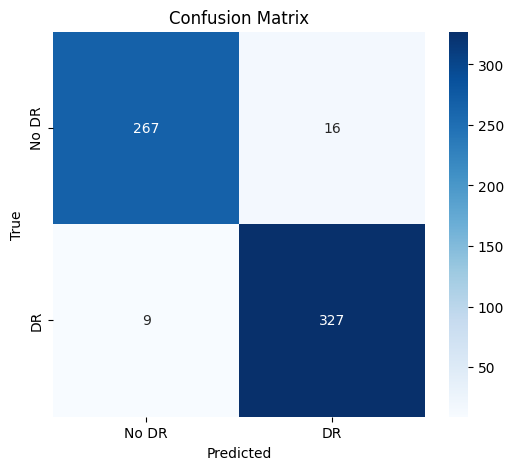

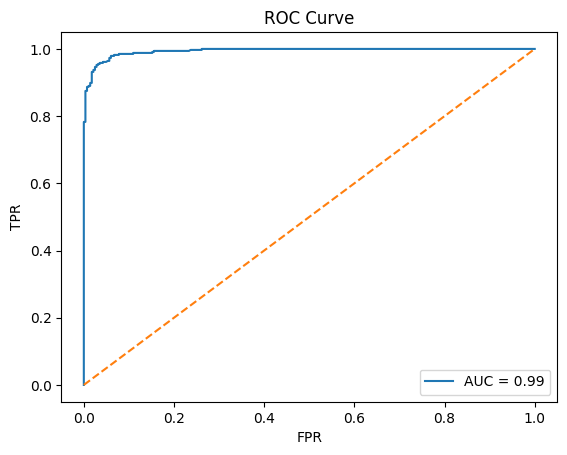

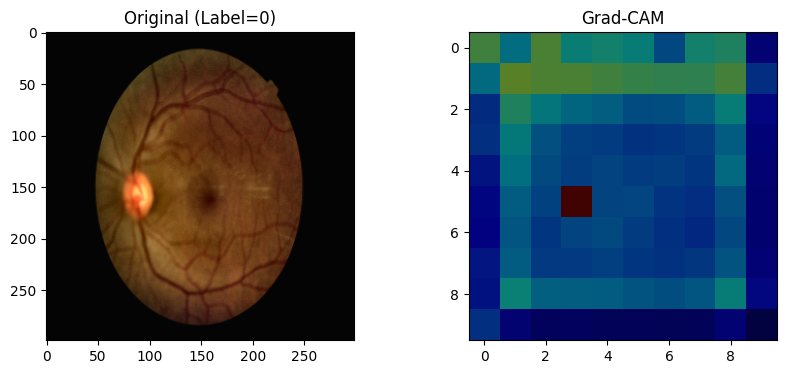

In [28]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset
from torchvision import datasets, transforms, models
from torchvision.models import inception_v3, Inception_V3_Weights
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.nn.functional as F

# --------------------------
# 1. Config
# --------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 8
EPOCHS = 20
LR = 1e-4

DATASET_ROOT = r"F:\Thessis\Data-Set 2"
APTOS_PATH = os.path.join(DATASET_ROOT, "Aptos")
BD_PATH    = os.path.join(DATASET_ROOT, "Bangladeshi-Dataset")

print("✅ Using combined dataset: Aptos + Bangladeshi")

# --------------------------
# 2. Transforms
# --------------------------
transform_train = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

transform_eval = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
])

# --------------------------
# 3. Dataset & DataLoader
# --------------------------
train_data = ConcatDataset([
    datasets.ImageFolder(os.path.join(APTOS_PATH, "train"), transform=transform_train),
    datasets.ImageFolder(os.path.join(BD_PATH, "train"), transform=transform_train)
])

val_data = ConcatDataset([
    datasets.ImageFolder(os.path.join(APTOS_PATH, "val"), transform=transform_eval),
    datasets.ImageFolder(os.path.join(BD_PATH, "val"), transform=transform_eval)
])

test_data = ConcatDataset([
    datasets.ImageFolder(os.path.join(APTOS_PATH, "test"), transform=transform_eval),
    datasets.ImageFolder(os.path.join(BD_PATH, "test"), transform=transform_eval)
])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

print(f"Train size: {len(train_data)}, Val size: {len(val_data)}, Test size: {len(test_data)}")

# --------------------------
# 4. Hybrid Model + Focal Loss
# --------------------------
class CNNBackbone(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        inception = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, aux_logits=True)

        self.resnet_features = nn.Sequential(
            resnet.conv1, resnet.bn1, resnet.relu, resnet.maxpool,
            resnet.layer1, resnet.layer2, resnet.layer3, resnet.layer4
        )

        self.inception_features = nn.Sequential(
            inception.Conv2d_1a_3x3, inception.Conv2d_2a_3x3, inception.Conv2d_2b_3x3,
            inception.maxpool1, inception.Conv2d_3b_1x1, inception.Conv2d_4a_3x3,
            inception.maxpool2, inception.Mixed_5b, inception.Mixed_5c, inception.Mixed_5d,
            inception.Mixed_6a, inception.Mixed_6b, inception.Mixed_6c, inception.Mixed_6d,
            inception.Mixed_6e, inception.Mixed_7a, inception.Mixed_7b, inception.Mixed_7c
        )

        self.pool = nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        r = self.pool(self.resnet_features(x))   # [B, 512, 1, 1]
        r = torch.flatten(r, 1)
        i = self.pool(self.inception_features(x)) # [B, 2048, 1, 1]
        i = torch.flatten(i, 1)
        return torch.cat([r, i], dim=1)          # [B, 2560]

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=299, patch_size=16, in_chans=3, embed_dim=256):
        super().__init__()
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, (img_size//patch_size)**2 + 1, embed_dim))
    def forward(self, x):
        B = x.shape[0]
        x = self.proj(x).flatten(2).transpose(1,2)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        return torch.cat((cls_tokens, x), dim=1) + self.pos_embed

class ViTBranch(nn.Module):
    def __init__(self, embed_dim=256, num_heads=8, depth=4):
        super().__init__()
        self.patch_embed = PatchEmbedding()
        encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, dim_feedforward=512)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
    def forward(self, x):
        x = self.patch_embed(x)
        return self.transformer(x)[:,0]

class HybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = CNNBackbone()
        self.vit = ViTBranch()
        self.fc = nn.Sequential(
            nn.Linear(2560 + 256, 1024),
            nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(1024, 256),
            nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, 1)   # ✅ removed Sigmoid
        )
    def forward(self, x):
        return self.fc(torch.cat([self.cnn(x), self.vit(x)], dim=1))  # logits

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha, self.gamma, self.reduction = alpha, gamma, reduction
    def forward(self, inputs, targets):
        bce = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')  # ✅ safe
        pt = torch.exp(-bce)
        loss = self.alpha * (1-pt)**self.gamma * bce
        return loss.mean() if self.reduction == 'mean' else loss.sum()

model = HybridModel().to(DEVICE)
criterion = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# --------------------------
# 5. Training Loop (AMP enabled)
# --------------------------
scaler = torch.amp.GradScaler("cuda")

def train_model(model, train_loader, val_loader, epochs):
    train_losses, val_losses, val_acc = [], [], []
    for epoch in range(epochs):
        model.train(); running_loss = 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(DEVICE), labels.float().to(DEVICE).view(-1,1)
            optimizer.zero_grad()

            with torch.amp.autocast("cuda"):
                outputs = model(imgs)   # logits
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval(); val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(DEVICE), labels.float().to(DEVICE).view(-1,1)
                with torch.amp.autocast("cuda"):
                    outputs = model(imgs)   # logits
                    loss = criterion(outputs, labels)
                val_loss += loss.item()
                probs = torch.sigmoid(outputs)   # ✅ apply sigmoid here
                preds = (probs >= 0.5).int()
                correct += (preds == labels.int()).sum().item()
                total += labels.size(0)
        avg_val_loss = val_loss / len(val_loader)
        acc = correct / total
        val_losses.append(avg_val_loss); val_acc.append(acc)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {acc:.4f}")
    return train_losses, val_losses, val_acc

train_losses, val_losses, val_acc = train_model(model, train_loader, val_loader, EPOCHS)

# --------------------------
# 6. Evaluation
# --------------------------
y_true, y_pred, y_prob = [], [], []
model.eval()
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        with torch.amp.autocast("cuda"):
            outputs = model(imgs)   # logits
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()  # ✅ sigmoid here
        preds = (probs >= 0.5).astype(int)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds)
        y_prob.extend(probs)

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["No DR", "DR"]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No DR", "DR"], yticklabels=["No DR", "DR"])
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(); plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}"); plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend(); plt.show()

# --------------------------
# 7. Grad-CAM
# --------------------------
from torchcam.methods import SmoothGradCAMpp

cam_extractor = SmoothGradCAMpp(model, target_layer="cnn.resnet_features.7")
img, label = test_data[0]
input_tensor = img.unsqueeze(0).to(DEVICE)

out = model(input_tensor)
probs = torch.sigmoid(out)   # ✅ sigmoid for interpretation
pred = int(probs.item() >= 0.5)

activation_map = cam_extractor(class_idx=pred, scores=out)[0]
cam = activation_map.squeeze().cpu()
cam = (cam - cam.min()) / (cam.max() - cam.min())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img.permute(1,2,0))
plt.title(f"Original (Label={label})")

plt.subplot(1,2,2)
plt.imshow(img.permute(1,2,0))
plt.imshow(cam.numpy(), cmap="jet", alpha=0.5)
plt.title("Grad-CAM")
plt.show()


